# Plot

In [1]:
import sys
import pandas as pd

sys.path.append('../src') 
from util import get_rcode_df
from util import read_csv

from preprocessing import join_meta
from es_client import *

from preprocessing import * 

In [3]:
rcode_df = get_rcode_df('../data/road_code.csv')
 
es = ESClient() 
sales_df = es._search_by_aptname('real-estate', "단대푸르지오") 
 
df = preprocessing_trade(join_meta(sales_df, rcode_df))

In [4]:
df.head(10)

,date,거래금액,건축년도,년,법정동,아파트,월,일,전용면적,지번,지역코드,층,시,구,도로명,시군구,평당거래액,평수,규모
0,2012-09-01,47500,2012,2012,단대동,단대푸르지오,9,1~10,84.70,100,41131,9,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,560.802834,25.621790,60-85m2이하
1,2012-09-01,33200,2012,2012,단대동,단대푸르지오,9,1~10,59.72,100,41131,1,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,555.927662,18.065328,60m이하
2,2012-09-01,32300,2012,2012,단대동,단대푸르지오,9,11~20,59.97,100,41131,1,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,538.602635,18.140953,60m이하
3,2012-09-01,44800,2012,2012,단대동,단대푸르지오,9,21~30,84.70,100,41131,2,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,528.925620,25.621790,60-85m2이하
4,2012-10-01,47500,2012,2012,단대동,단대푸르지오,10,1~10,84.70,100,41131,15,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,560.802834,25.621790,60-85m2이하
5,2013-05-01,44800,2012,2013,단대동,단대푸르지오,5,1~10,84.74,100,41131,2,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,528.675950,25.633890,60-85m2이하
6,2013-06-01,43900,2012,2013,단대동,단대푸르지오,6,11~20,84.70,100,41131,1,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,518.299882,25.621790,60-85m2이하
7,2013-07-01,43900,2012,2013,단대동,단대푸르지오,7,1~10,84.70,100,41131,1,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,518.299882,25.621790,60-85m2이하
8,2013-09-01,43500,2012,2013,단대동,단대푸르지오,9,1~10,84.74,100,41131,2,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,513.334907,25.633890,60-85m2이하
9,2013-09-01,44800,2012,2013,단대동,단대푸르지오,9,21~30,84.74,100,41131,2,경기도,성남시 수정구,창업로57번길,경기도 성남시 수정구,528.675950,25.633890,60-85m2이하


# Plot을 사용하기 전에...

* matplotlib을 juypter에서 사용하기전에 별도의 셋팅이 필요하다. 
* font 설정, plot 결과가 jupyter에 표시되도록

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
fontname = u'/usr/share/fonts/nhn-nanum/NanumGothic.ttf' #plt.font_manager.get_fontconfig_fonts()[0]
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname) 

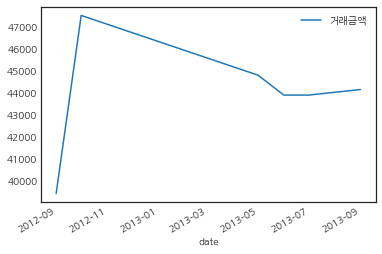

In [6]:
df[['거래금액', 'date']].groupby('date').mean().plot()

# 좀더 보기 좋은 plot을 만들기

* grid, marker
* set_ylabel, set_xlabel
* table

In [11]:
df2 = df[['거래금액', 'date']].groupby('date').mean() 
# df[['거래금액', 'date']].groupby('date').mean().plot(grid=True, marker='v')

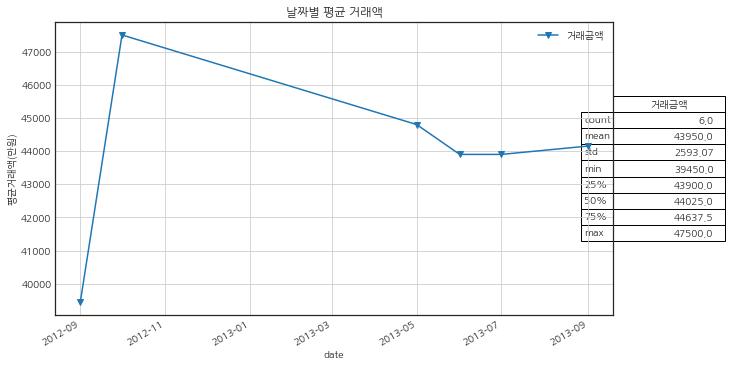

In [20]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1) 
table(ax
      ,np.round(df2.reset_index().describe(), 2)
      ,loc='right' # right, bottom, top
      ,colWidths=[0.2, 0.2, 0.2])
ax.set_ylabel(u'평균거래액(만원)')
ax.set_xlabel(u'날짜')

x = df2.plot(ax=ax, figsize=(10,6), grid=True, marker='v', title=u"날짜별 평균 거래액") 

In [ ]:
plt.savefig('boxplot.png', dpi=200, bbox_inches='tight')